In [ ]:
import os
os.chdir("../")

In [2]:
from crnn.data.preprocess.dataset_preprocess import Preprocess, Dataset
from crnn.data.postprocess.decode import Decoder
from configs.config import params as param
from crnn.modeling.base_model import BaseModel
from crnn.utils.accuracy import acc

import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# 读取数据集

In [3]:
def get_images_labels():
    images = [cv2.imread(os.path.join(param['test_dataset_path'], img)) for img in os.listdir(param['test_dataset_path']) if '.jpg' in img]
    labels_path = [os.path.join(param['test_dataset_path'], img) for img in os.listdir(param['test_dataset_path']) if '.txt' in img]
    labels = []
    for file in labels_path:
        with open(file,'r',encoding='utf8') as f:
            label = f.read()
        labels.append(label)
    return images, labels

In [4]:
images, test_labels = get_images_labels()

# 构建模型

In [5]:
basemodels = BaseModel(param=param)
model = basemodels.build()
model.load_weights(os.path.join(param['save_path'], 'crnn_{0}.h5'.format(str(param['test_epoch']))))
model.summary()

Model: "crnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_data (InputLayer)      [(None, 32, None, 3)]     0         
_________________________________________________________________
rescaling (Rescaling)        (None, 32, None, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, None, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, None, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, None, 128)     73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, None, 128)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, None, 256)      295168 

In [10]:
def preprocess(images):
    results = []
    imgH, imgW, imgC=(32, 4000, 3)
    decoder = Decoder(param)
    for image in images:
        image = image.astype('float32')
        resized_image = tf.image.resize(image, [imgH, imgW],preserve_aspect_ratio=True)
        padding_im = tf.image.pad_to_bounding_box(resized_image,0,0,imgH, resized_image.shape[1])
        padding_im = np.expand_dims(padding_im, axis=0)
        result = model.predict(padding_im)
        y_pred = decoder.decode(result, method='greedy')
        results.append(y_pred[0])
    return results

# 预测

0 ---------------------------------------


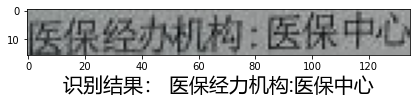

1 ---------------------------------------


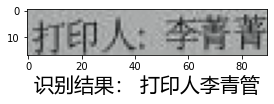

2 ---------------------------------------


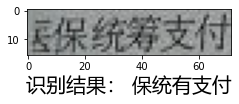

3 ---------------------------------------


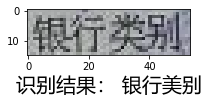

4 ---------------------------------------


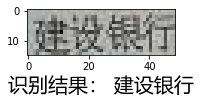

5 ---------------------------------------


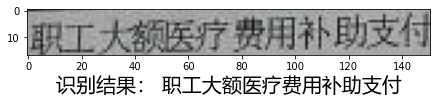

6 ---------------------------------------


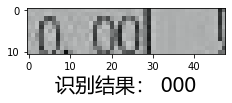

7 ---------------------------------------


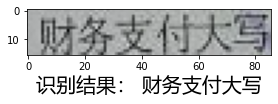

8 ---------------------------------------


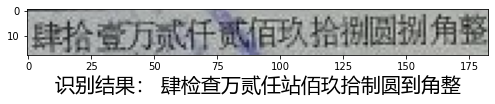

9 ---------------------------------------


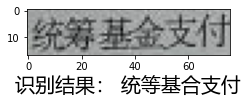

10 ---------------------------------------


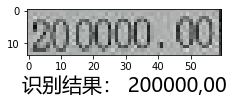

11 ---------------------------------------


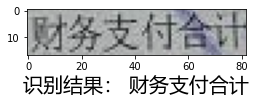

12 ---------------------------------------


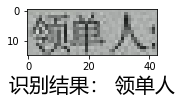

13 ---------------------------------------


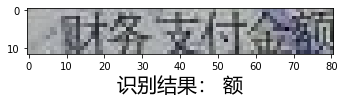

14 ---------------------------------------


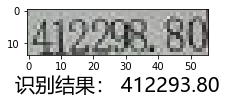

15 ---------------------------------------


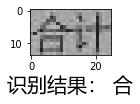

16 ---------------------------------------


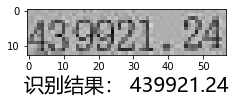

17 ---------------------------------------


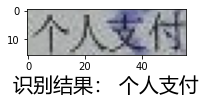

18 ---------------------------------------


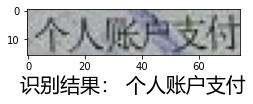

19 ---------------------------------------


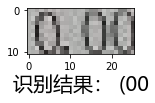

20 ---------------------------------------


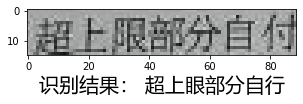

21 ---------------------------------------


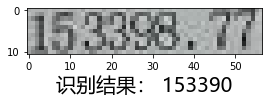

22 ---------------------------------------


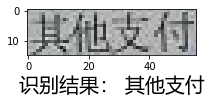

23 ---------------------------------------


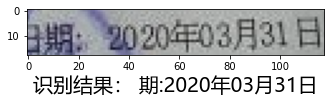

24 ---------------------------------------


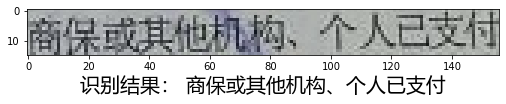

25 ---------------------------------------


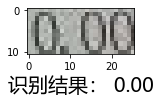

26 ---------------------------------------


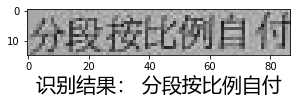

27 ---------------------------------------


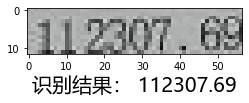

28 ---------------------------------------


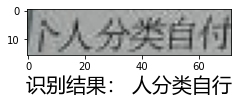

29 ---------------------------------------


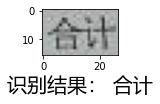

30 ---------------------------------------


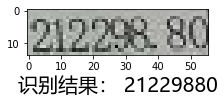

31 ---------------------------------------


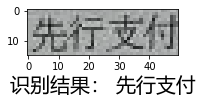

32 ---------------------------------------


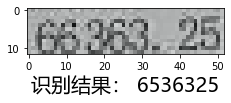

33 ---------------------------------------


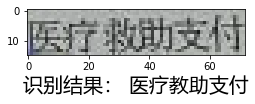

34 ---------------------------------------


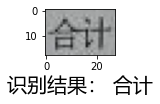

35 ---------------------------------------


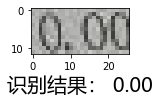

36 ---------------------------------------


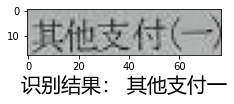

37 ---------------------------------------


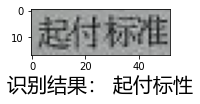

38 ---------------------------------------


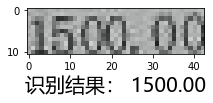

39 ---------------------------------------


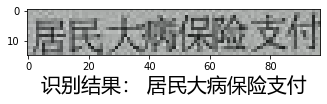

40 ---------------------------------------


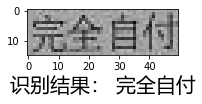

41 ---------------------------------------


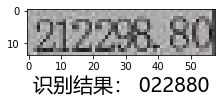

42 ---------------------------------------


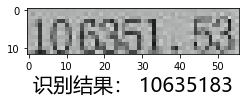

43 ---------------------------------------


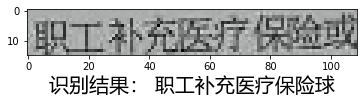

44 ---------------------------------------


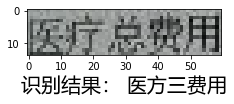

45 ---------------------------------------


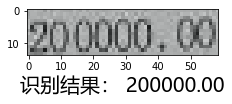

46 ---------------------------------------


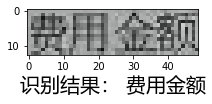

47 ---------------------------------------


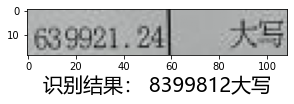

48 ---------------------------------------


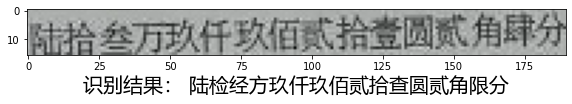

49 ---------------------------------------


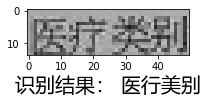

50 ---------------------------------------


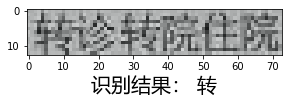

51 ---------------------------------------


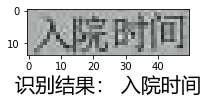

52 ---------------------------------------


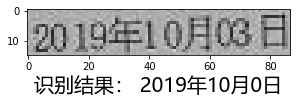

53 ---------------------------------------


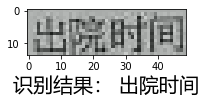

54 ---------------------------------------


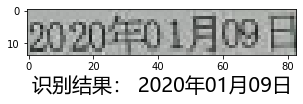

55 ---------------------------------------


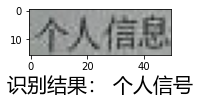

56 ---------------------------------------


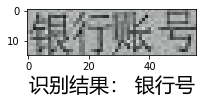

57 ---------------------------------------


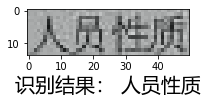

58 ---------------------------------------


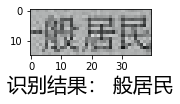

59 ---------------------------------------


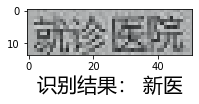

60 ---------------------------------------


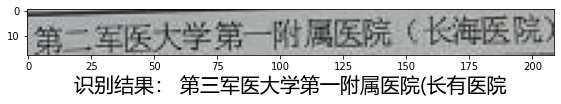

61 ---------------------------------------


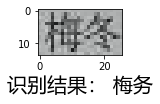

62 ---------------------------------------


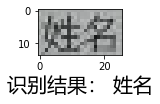

63 ---------------------------------------


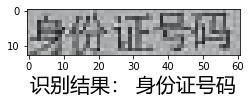

64 ---------------------------------------


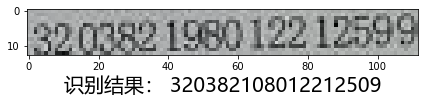

65 ---------------------------------------


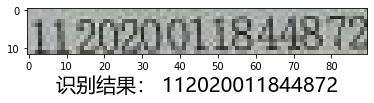

66 ---------------------------------------


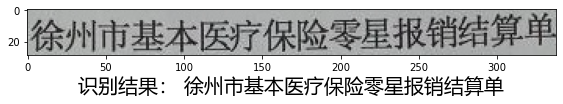

67 ---------------------------------------


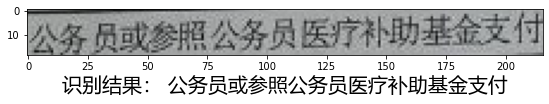

68 ---------------------------------------


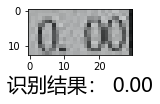

69 ---------------------------------------


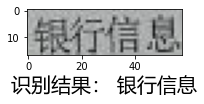

70 ---------------------------------------


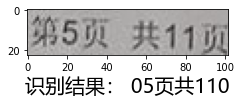

71 ---------------------------------------


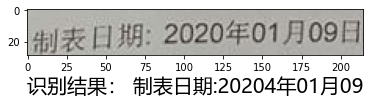

72 ---------------------------------------


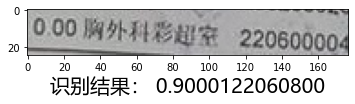

73 ---------------------------------------


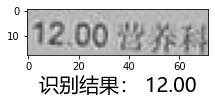

74 ---------------------------------------


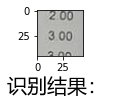

75 ---------------------------------------


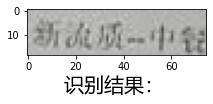

76 ---------------------------------------


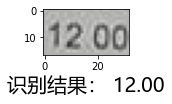

77 ---------------------------------------


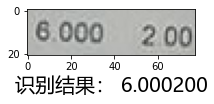

78 ---------------------------------------


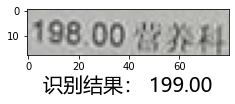

79 ---------------------------------------


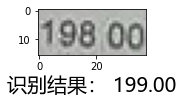

80 ---------------------------------------


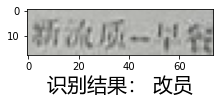

81 ---------------------------------------


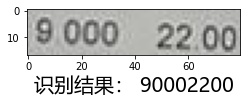

82 ---------------------------------------


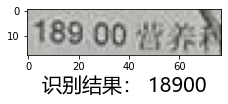

83 ---------------------------------------


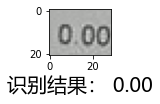

84 ---------------------------------------


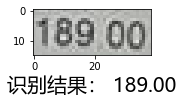

85 ---------------------------------------


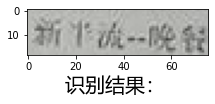

86 ---------------------------------------


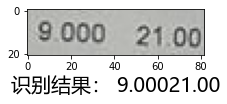

87 ---------------------------------------


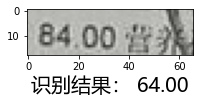

88 ---------------------------------------


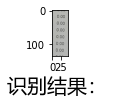

89 ---------------------------------------


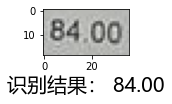

90 ---------------------------------------


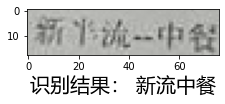

91 ---------------------------------------


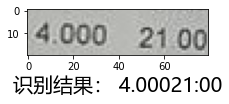

92 ---------------------------------------


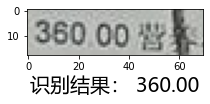

93 ---------------------------------------


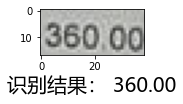

94 ---------------------------------------


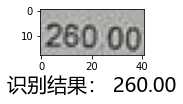

95 ---------------------------------------


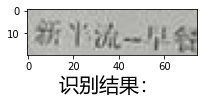

96 ---------------------------------------


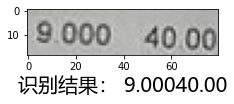

97 ---------------------------------------


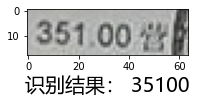

98 ---------------------------------------


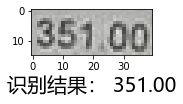

99 ---------------------------------------


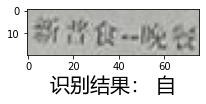

In [11]:
font = FontProperties(fname='./tests/fonts/msyh.ttc', size=20)

# 预测
y_pred = preprocess(images[:100])

result_list = []

# 准确率
# acc1, acc2 = acc(y_pred, test_labels)
print("========================================")
# print("严格准确率：{0} \t 相似准确率：{1}".format(acc1, acc2))
# 结果展示
for i,sentense in enumerate(y_pred):
    result_list.append(sentense)
    #if sentense != test_labels[i] or 1:
    print(i,'---------------------------------------')
    plt.figure(figsize=(32,100))
    plt.subplot(len(y_pred),1,i+1)
    plt.imshow(images[i]/255)
    plt.xlabel('识别结果： '+sentense, fontproperties=font)
    plt.show()
    # print('真实标签： '+test_labels[i])